In [1]:
# importing the necessary modules
import pandas as pd
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

In [2]:
# importing the dataset
df = pd.read_excel('/Users/adminaccount/Downloads/Final Data.xlsx')

In [3]:
df.head()

,Intelligence 1,Intelligence 2,Intelligence 3,Interest 1,Interest 2,Interest 3
0,Existential,Visual-Spatial,Interpersonal,Investigative,Artistic,Social
1,Existential,Intrapersonal,Bodily-Kinesthetic,Investigative,Realistic,Artistic
2,Visual-Spatial,Naturalistic,Existential,Artistic,Enterprising,Investigative
3,Linguistic,Existential,Logical-Mathematical,Conventional,Investigative,Realistic
4,Bodily-Kinesthetic,Interpersonal,Musical,Artistic,Social,Enterprising


In [4]:
df.isnull().sum()

Intelligence 1    0
Intelligence 2    0
Intelligence 3    0
Interest 1        0
Interest 2        0
Interest 3        0
dtype: int64

# Finding the optimal number of clusters

In [5]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters,init='random',n_init=5,verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 67518.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 67518.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 67518.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 67518.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 67518.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 57942.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2184, cost: 57447.0
Run 2, iteration: 2/100, moves: 105, cost: 57447.0
Init: initializing ce

# Elbow method for finding the optimal K

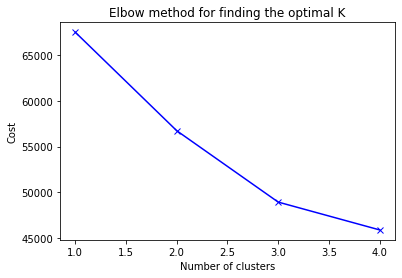

In [6]:
plt.plot(K,cost,'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Elbow method for finding the optimal K')
plt.show()

# Taking K = 3

In [7]:
kmode = KModes(n_clusters=3,init='random',n_init=1,verbose=True)
clusters = kmode.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2117, cost: 57481.0
Run 1, iteration: 2/100, moves: 137, cost: 57481.0


In [8]:
df['Cluster'] = clusters

In [9]:
df.Cluster.value_counts()

0    7577
1    5769
2    1865
Name: Cluster, dtype: int64

# Persons belonging to the first cluster

In [10]:
df[df.Cluster == 0].head(20)

,Intelligence 1,Intelligence 2,Intelligence 3,Interest 1,Interest 2,Interest 3,Cluster
0,Existential,Visual-Spatial,Interpersonal,Investigative,Artistic,Social,0
3,Linguistic,Existential,Logical-Mathematical,Conventional,Investigative,Realistic,0
4,Bodily-Kinesthetic,Interpersonal,Musical,Artistic,Social,Enterprising,0
6,Interpersonal,Existential,Logical-Mathematical,Social,Investigative,Conventional,0
8,Interpersonal,Existential,Logical-Mathematical,Social,Investigative,Conventional,0
10,Musical,Interpersonal,Logical-Mathematical,Artistic,Social,Conventional,0
11,Interpersonal,Naturalistic,Logical-Mathematical,Social,Enterprising,Conventional,0
13,Visual-Spatial,Interpersonal,Intrapersonal,Artistic,Social,Realistic,0
14,Naturalistic,Logical-Mathematical,Interpersonal,Enterprising,Conventional,Social,0
16,Existential,Visual-Spatial,Intrapersonal,Investigative,Artistic,Realistic,0


# Persons belonging to the second cluster

In [11]:
df[df.Cluster == 1].head(20)

,Intelligence 1,Intelligence 2,Intelligence 3,Interest 1,Interest 2,Interest 3,Cluster
2,Visual-Spatial,Naturalistic,Existential,Artistic,Enterprising,Investigative,1
5,Musical,Naturalistic,Interpersonal,Artistic,Enterprising,Social,1
7,Musical,Naturalistic,Interpersonal,Artistic,Enterprising,Social,1
12,Bodily-Kinesthetic,Visual-Spatial,Intrapersonal,Artistic,Enterprising,Realistic,1
15,Existential,Logical-Mathematical,Linguistic,Investigative,Conventional,Realistic,1
17,Interpersonal,Naturalistic,Visual-Spatial,Social,Enterprising,Artistic,1
21,Existential,Musical,Interpersonal,Investigative,Artistic,Social,1
24,Existential,Naturalistic,Interpersonal,Investigative,Enterprising,Social,1
25,Existential,Intrapersonal,Musical,Investigative,Realistic,Artistic,1
26,Existential,Interpersonal,Musical,Investigative,Social,Artistic,1


# Persons belonging to the third cluster

In [12]:
df[df.Cluster == 2].head(20)

,Intelligence 1,Intelligence 2,Intelligence 3,Interest 1,Interest 2,Interest 3,Cluster
1,Existential,Intrapersonal,Bodily-Kinesthetic,Investigative,Realistic,Artistic,2
9,Naturalistic,Existential,Bodily-Kinesthetic,Enterprising,Investigative,Artistic,2
18,Linguistic,Musical,Bodily-Kinesthetic,Conventional,Artistic,Enterprising,2
23,Naturalistic,Musical,Interpersonal,Enterprising,Artistic,Social,2
31,Naturalistic,Interpersonal,Musical,Enterprising,Social,Artistic,2
56,Logical-Mathematical,Musical,Bodily-Kinesthetic,Conventional,Artistic,Enterprising,2
66,Naturalistic,Existential,Bodily-Kinesthetic,Enterprising,Investigative,Artistic,2
73,Intrapersonal,Naturalistic,Musical,Realistic,Enterprising,Artistic,2
74,Intrapersonal,Musical,Bodily-Kinesthetic,Realistic,Artistic,Enterprising,2
75,Naturalistic,Linguistic,Musical,Enterprising,Conventional,Artistic,2


In [13]:
cluster_1 = df[df.Cluster == 0]

In [14]:
cluster_1

,Intelligence 1,Intelligence 2,Intelligence 3,Interest 1,Interest 2,Interest 3,Cluster
0,Existential,Visual-Spatial,Interpersonal,Investigative,Artistic,Social,0
3,Linguistic,Existential,Logical-Mathematical,Conventional,Investigative,Realistic,0
4,Bodily-Kinesthetic,Interpersonal,Musical,Artistic,Social,Enterprising,0
6,Interpersonal,Existential,Logical-Mathematical,Social,Investigative,Conventional,0
8,Interpersonal,Existential,Logical-Mathematical,Social,Investigative,Conventional,0
...,...,...,...,...,...,...,...
15203,Visual-Spatial,Linguistic,Logical-Mathematical,Artistic,Conventional,Realistic,0
15207,Musical,Intrapersonal,Visual-Spatial,Artistic,Realistic,Enterprising,0
15208,Musical,Interpersonal,Bodily-Kinesthetic,Artistic,Social,Enterprising,0
15209,Naturalistic,Existential,Intrapersonal,Enterprising,Investigative,Realistic,0


# Generating Internal clusters within cluster 1

In [15]:
cost_1 = []
K_1 = range(1,5)
for num_clusters in list(K_1):
    kmode = KModes(n_clusters=num_clusters,init='random',n_init=5,verbose=1)
    kmode.fit_predict(df)
    cost_1.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 75152.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 75152.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 75152.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 75152.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 75152.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1898, cost: 62692.0
Run 1, iteration: 2/100, moves: 32, cost: 62692.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1517, cost: 62692.0
Run 2, iteration: 2

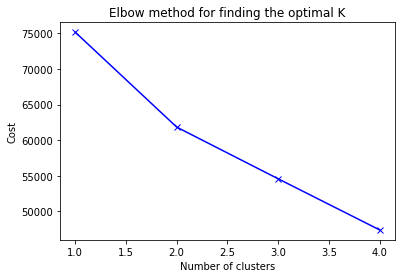

In [16]:
plt.plot(K_1,cost_1,'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Elbow method for finding the optimal K')
plt.show()

In [17]:
kmode_1 = KModes(n_clusters=3,init='random',n_init=1,verbose=True)
clusters_1 = kmode.fit_predict(cluster_1.iloc[:,:6])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1156, cost: 22240.0
Run 1, iteration: 2/100, moves: 151, cost: 22240.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2331, cost: 20499.0
Run 2, iteration: 2/100, moves: 786, cost: 20499.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1211, cost: 24976.0
Run 3, iteration: 2/100, moves: 177, cost: 24976.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2567, cost: 21167.0
Run 4, iteration: 2/100, moves: 511, cost: 21167.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1796, cost: 22318.0
Run 5, iteration: 2/100, moves: 644, cost: 22318.0
Best run was number 2


In [18]:
cluster_1['Internal_cluster'] = clusters_1

<ipython-input-18-791e198cbffe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1['Internal_cluster'] = clusters_1


In [21]:
cluster_1.head(20)

,Intelligence 1,Intelligence 2,Intelligence 3,Interest 1,Interest 2,Interest 3,Cluster,Internal_cluster
0,Existential,Visual-Spatial,Interpersonal,Investigative,Artistic,Social,0,2
3,Linguistic,Existential,Logical-Mathematical,Conventional,Investigative,Realistic,0,3
4,Bodily-Kinesthetic,Interpersonal,Musical,Artistic,Social,Enterprising,0,1
6,Interpersonal,Existential,Logical-Mathematical,Social,Investigative,Conventional,0,0
8,Interpersonal,Existential,Logical-Mathematical,Social,Investigative,Conventional,0,0
10,Musical,Interpersonal,Logical-Mathematical,Artistic,Social,Conventional,0,1
11,Interpersonal,Naturalistic,Logical-Mathematical,Social,Enterprising,Conventional,0,0
13,Visual-Spatial,Interpersonal,Intrapersonal,Artistic,Social,Realistic,0,1
14,Naturalistic,Logical-Mathematical,Interpersonal,Enterprising,Conventional,Social,0,3
16,Existential,Visual-Spatial,Intrapersonal,Investigative,Artistic,Realistic,0,2
